In [6]:
# importing and configering libs

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',2000) # show all columns in jupyter
pd.set_option('display.max_rows', 100) # display 100 at least rows

In [8]:
# Loading the data

In [9]:
colsToLoad =["INSTNM","ADM_RATE","ADM_RATE_ALL","ACTCMMID","ACTENMID","ACTMTMID","ACTWRMID","SAT_AVG","SAT_AVG_ALL","SATMTMID","UGDS","HIGHDEG", "CONTROL", "TUITFTE", "INEXPFTE", "AVGFACSAL", "COSTT4_P",
             "COSTT4_A", "PCTFLOAN", "PCTPELL", "COMP_ORIG_YR2_RT","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","PPTUG_EF","COSTT4_A","TUITIONFEE_IN","TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","AVGFACSAL","DEATH_YR3_RT","COMP_ORIG_YR3_RT","LOAN_DEATH_YR3_RT","LOAN_COMP_ORIG_YR3_RT","DEATH_YR4_RT","COMP_ORIG_YR4_RT","AGE_ENTRY","COUNT_NWNE_P10","COUNT_WNE_P10","MN_EARN_WNE_P10","MD_EARN_WNE_P10","COMPL_RPY_1YR_RT"]

# As each data row represent a specific institute , So we can use institute name as an index
index_feature = "INSTNM"

scoreCardDF = pd.read_csv("../../data/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv", index_col=index_feature, usecols=colsToLoad)
# ignore "MEDIAN_HH_INC" column, as 0 non-null float64

In [10]:
# General exploration of data 

In [11]:
scoreCardDF.head()

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,SATMTMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,COMP_ORIG_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,COMP_ORIG_YR4_RT,COMPL_RPY_1YR_RT,AGE_ENTRY,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,4,1,0.8989,0.8989,400.0,17.0,17.0,17.0,NaN,823.0,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,18888.0,NaN,7182.0,12774.0,NaN,9063.0,7459.0,7079.0,0.7115,0.8204,0.034958602,PrivacySuppressed,0.097451274,PrivacySuppressed,0.087332809,PrivacySuppressed,0.241845664,0.3075801749,20.540410133,246,1741,34300,29900
University of Alabama at Birmingham,4,1,0.8673,0.8673,585.0,25.0,26.0,23.0,NaN,1146.0,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,19990.0,NaN,7206.0,16398.0,NaN,9033.0,17208.0,10170.0,0.3505,0.5397,0.150529204,PrivacySuppressed,0.333945628,PrivacySuppressed,0.332664527,PrivacySuppressed,0.422933112,0.578436134,23.45881476,470,3474,46400,40200
Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,12300.0,NaN,6870.0,6870.0,NaN,12057.0,5123.0,3849.0,0.6839,0.7629,0.058823529,PrivacySuppressed,0.161849711,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.209580838,0.3859649123,33.925581395,57,168,46100,40100
University of Alabama in Huntsville,4,1,0.8062,0.8062,580.0,26.0,26.0,25.0,NaN,1180.0,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,20306.0,NaN,9192.0,21506.0,NaN,8322.0,9352.0,9341.0,0.3281,0.4728,0.157939189,PrivacySuppressed,0.284602076,PrivacySuppressed,0.283109405,PrivacySuppressed,0.393046107,0.639589169,24.10127697,188,1361,50500,45600
Alabama State University,4,1,0.5125,0.5125,425.0,17.0,17.0,17.0,NaN,830.0,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,17400.0,NaN,8720.0,15656.0,NaN,7813.0,7393.0,6557.0,0.8265,0.8735,0.028949025,PrivacySuppressed,0.115574348,PrivacySuppressed,0.10949464,PrivacySuppressed,0.187935035,0.2118863049,20.648575305,285,1977,29500,26700


In [12]:
scoreCardDF.shape

(7804, 45)

In [13]:
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 45 columns):
HIGHDEG                  7804 non-null int64
CONTROL                  7804 non-null int64
ADM_RATE                 2221 non-null float64
ADM_RATE_ALL             2486 non-null float64
SATMTMID                 1317 non-null float64
ACTCMMID                 1344 non-null float64
ACTENMID                 1167 non-null float64
ACTMTMID                 1168 non-null float64
ACTWRMID                 300 non-null float64
SAT_AVG                  1422 non-null float64
SAT_AVG_ALL              1532 non-null float64
UGDS                     7091 non-null float64
UGDS_WHITE               7091 non-null float64
UGDS_BLACK               7091 non-null float64
UGDS_HISP                7091 non-null float64
UGDS_ASIAN               7091 non-null float64
UGDS_AIAN                7091 non-null float64
UGDS_NHPI                7091 non-null float64

In [14]:
# Assuming that the output or target variable is COMPL_RPY_1YR_RT
target_feature = "COMPL_RPY_1YR_RT"

In [15]:
# get the number of null values at each column to check if target variable COMPL_RPY_1YR_RT has null at any rows or not
scoreCardDF.isnull().sum()

HIGHDEG                     0
CONTROL                     0
ADM_RATE                 5583
ADM_RATE_ALL             5318
SATMTMID                 6487
ACTCMMID                 6460
ACTENMID                 6637
ACTMTMID                 6636
ACTWRMID                 7504
SAT_AVG                  6382
SAT_AVG_ALL              6272
UGDS                      713
UGDS_WHITE                713
UGDS_BLACK                713
UGDS_HISP                 713
UGDS_ASIAN                713
UGDS_AIAN                 713
UGDS_NHPI                 713
UGDS_2MOR                 713
UGDS_NRA                  713
UGDS_UNKN                 713
PPTUG_EF                  732
COSTT4_A                 3665
COSTT4_P                 5261
TUITIONFEE_IN            3298
TUITIONFEE_OUT           3517
TUITIONFEE_PROG          5056
TUITFTE                   442
INEXPFTE                  442
AVGFACSAL                3150
PCTPELL                   741
PCTFLOAN                  741
COMP_ORIG_YR2_RT          207
DEATH_YR3_

In [16]:
# Data preprocessing

In [17]:
# drop all rows that do not have a value for out target variable
scoreCardDF = scoreCardDF[(scoreCardDF[target_feature] != "PrivacySuppressed")\
                          & (scoreCardDF[target_feature] != np.nan)\
                          & (scoreCardDF[target_feature] != None)\
                          &(scoreCardDF[target_feature].notna())]
scoreCardDF.shape

(5632, 45)

In [18]:
# Extract input features by exluding the index feature and target output feature from the loadd features
input_features =  [f for f in colsToLoad if f not in [index_feature,target_feature]] 
# Specify categorial features columns
cat_columns = ["HIGHDEG","CONTROL"]
# Extract input float features by excluding categorial features
float_columns = [f for f in input_features if f not in cat_columns]

In [19]:
# As some columns have PrivacySuppressed as a value to indicate that the value is missing/hidden due to data privacy
# we define function that loop across all columns (features) to replace "PrivacySuppressed" value with null/nan 
# and convert it into float type
def cleanPrivacySuppressed(dataFrame):
    for colName in dataFrame.columns:
        dataFrame[colName] = dataFrame[colName].replace("PrivacySuppressed", np.nan)
        dataFrame[colName] = dataFrame[colName].astype(float)
    return dataFrame

# Build an estimator for this function to be used by ML pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class PrivacySuppressedHandler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        return cleanPrivacySuppressed(X)

In [20]:
# pipeline for all float columns
# it is a separate pipline, because there is a potential to add more preprocessing steps based on model evaluation
float_pipeline = ColumnTransformer([("privacy_suppressed_handler", PrivacySuppressedHandler(),float_columns)])

In [21]:
# pipeline for all Categoricol (discrete) columns
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = ColumnTransformer([("hot_encoder",OneHotEncoder(sparse=False),cat_columns)])

In [22]:
# Build a full pipeline for preprocessing by merge these two pipelines in one
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[("float_pipeline", float_pipeline),("cat_pipeline", cat_pipeline)])

In [23]:
# Execute the preprocessing pipeline of the input features
processed_input_features = full_pipeline.fit_transform(scoreCardDF)
processed_input_features = pd.DataFrame(processed_input_features)
target_output = scoreCardDF[target_feature]

In [24]:
# Split the data into training and test sets with ration 80 / 20
input_train, input_test, output_train, output_test =\
    train_test_split(processed_input_features, target_output.values, test_size=0.2, random_state=0)

In [25]:
# deine function to impute/replace null values with mean value across all columns of training datafram using scikit learn imputer
from sklearn.impute import SimpleImputer
def imputeNullWithMean(dataFrame):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = pd.DataFrame(imputer.fit_transform(dataFrame), columns=dataFrame.columns)
    return imputed_data , imputer

In [26]:
# imputation using mean value
input_train ,imputer = imputeNullWithMean(input_train)
input_test = imputer.fit_transform(input_test)
#input_train.isnull().sum()

In [27]:
# Training the algorithm (Multiple Linear Regression)
regressor = LinearRegression()
regressor.fit(input_train, output_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# To make predictions on the test data
output_pred = regressor.predict(input_test)

# To mak prediction on the training data to be used laterly while comparing error metrices for both 
# data sets to chech model overfitting or underfitting
output_train_pred = regressor.predict(input_train)

In [29]:
# To compare the actual output values for input_test which is (output_test) with the predicted values output_pred
df = pd.DataFrame({'Actual': output_test, 'Predicted': output_pred})
df

,Actual,Predicted
0,0.4418777943,0.522381
1,0.6991869919,0.670176
2,0.2754491018,0.280242
3,0.4281217209,0.530592
4,0.6611295681,0.553624
...,...,...
1122,0.575,0.513905
1123,0.5616024187,0.458957
1124,0.5319148936,0.592584
1125,0.3049327354,0.346864


In [30]:
# The final step is to evaluate the performance of algorithm on training set and test set
# We'll do this by finding the values for MAE, MSE, RMSE, and RSE 
# for training and testing set to discover any overfitting or underfitting
print('Train - Mean Absolute Error:', metrics.mean_absolute_error(output_train, output_train_pred))
print('Test - Mean Absolute Error:', metrics.mean_absolute_error(output_test, output_pred))
print('\n')
print('Train - Mean Squared Error:', metrics.mean_squared_error(output_train, output_train_pred))
print('Test - Mean Squared Error:', metrics.mean_squared_error(output_test, output_pred))
print('\n')
print('Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, output_train_pred)))
print('Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, output_pred)))
print('\n')
print('Train - Root Squared Error:', r2_score(output_train, output_train_pred))
print('Test - Root Squared Error:', r2_score(output_test, output_pred))

Train - Mean Absolute Error: 0.0755793939128935
Test - Mean Absolute Error: 0.07449102299010923


Train - Mean Squared Error: 0.010022086646405115
Test - Mean Squared Error: 0.009758818355413557


Train - Root Mean Squared Error: 0.1001103723217785
Test - Root Mean Squared Error: 0.0987867316769492


Train - Root Squared Error: 0.7425261699899406
Test - Root Squared Error: 0.7525477328413489


In [31]:
# Model Evaluation using Cross Validation 10 fold and root squared
cross_val_score(regressor, input_train, output_train, cv=10 ,scoring='r2')

array([  0.72877528,   0.73085071,   0.71432224,   0.61339686,
         0.76627738,   0.75840181,   0.7444182 ,   0.74728405,
         0.71933024, -50.55644246])

In [32]:
# Model Evaluation using Cross Validation 10 fold and RMSE
cross_val_score(regressor, input_train, output_train, cv=10 ,scoring='neg_root_mean_squared_error')

array([-0.1038303 , -0.10220054, -0.10536803, -0.11654019, -0.09850242,
       -0.0980925 , -0.09812204, -0.10319205, -0.10441802, -1.3614137 ])

In [33]:
# catHotColumns is how oneHotEncoder treats HIGHDEG AND CONTROL in preprocessing
catHotColumns =["HIGHDEG_Non-degree-granting","HIGHDEG_Certificate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","HIGHDEG_Associate_degree","CONTROL_Public","CONTROL_Private_nonprofit","CONTROL_Private for-profit"]
# ADD all toghether. this is the structre that gets out from the preprocessing pipline
all_features = float_columns.copy()
all_features.extend(catHotColumns)

In [34]:
x = regressor.coef_
x.sort()
x

array([-4.03425078e+02, -3.34125955e-01, -2.74826268e-01, -2.39830248e-01,
       -2.26419224e-01, -2.02084433e-01, -1.79526127e-01, -1.71961758e-01,
       -1.17396926e-01, -7.09227380e-02, -6.80610769e-02, -4.65394633e-02,
       -3.35568267e-02, -2.38742195e-02, -2.13789668e-02, -1.23046261e-02,
       -1.08431743e-02, -8.34484248e-03, -4.03172850e-03, -2.12866739e-03,
       -2.99933025e-04, -1.63013756e-05, -2.64741249e-06, -2.43358315e-06,
       -2.34069364e-06, -1.88589625e-06, -7.25327231e-07, -6.51031861e-07,
       -4.90659731e-07,  1.60774321e-07,  2.58462086e-07,  5.21831926e-07,
        7.81419487e-07,  8.90835837e-07,  1.80740524e-06,  2.90277788e-06,
        3.33132208e-06,  1.72448519e-04,  1.79407365e-04,  2.32907723e-04,
        3.05909571e-04,  9.32705488e-04,  2.68987260e-02,  2.70356240e-02,
        2.75942585e-02,  3.17500564e-02,  3.91726811e-02,  6.21788840e-02,
        6.48497596e-02,  6.82206826e-02,  8.40292067e-02,  3.14140561e-01,
        2.55859854e+00])

In [35]:
# get the features importance 
feature_name_importance = zip(all_features, regressor.coef_)
sorted(feature_name_importance, key=lambda x: x[1], reverse=True)

[('CONTROL_Private for-profit', 2.558598536481345),
 ('CONTROL_Private_nonprofit', 0.31414056080702046),
 ('CONTROL_Public', 0.08402920668498491),
 ('HIGHDEG_Associate_degree', 0.06822068259903874),
 ('HIGHDEG_Associate_degree', 0.06484975964853813),
 ('HIGHDEG_Associate_degree', 0.06217888402010846),
 ('HIGHDEG_Certificate_degree', 0.03917268110897628),
 ('HIGHDEG_Non-degree-granting', 0.03175005637643635),
 ('MD_EARN_WNE_P10', 0.02759425851672656),
 ('MN_EARN_WNE_P10', 0.027035624001194303),
 ('COUNT_WNE_P10', 0.02689872601741174),
 ('COUNT_NWNE_P10', 0.0009327054878076139),
 ('AGE_ENTRY', 0.0003059095711293591),
 ('COMP_ORIG_YR4_RT', 0.000232907722938014),
 ('DEATH_YR4_RT', 0.00017940736541380856),
 ('LOAN_COMP_ORIG_YR3_RT', 0.00017244851880387027),
 ('LOAN_DEATH_YR3_RT', 3.331322083077737e-06),
 ('COMP_ORIG_YR3_RT', 2.9027778791490544e-06),
 ('DEATH_YR3_RT', 1.8074052380301353e-06),
 ('AVGFACSAL', 8.90835837148165e-07),
 ('TUITFTE', 7.814194871447189e-07),
 ('TUITIONFEE_PROG', 5.21

In [36]:
feature_importance_df =pd.DataFrame(data=regressor.coef_, index=all_features, columns=["feature_importance"])
ax = feature_importance_df.sort_values("feature_importance", ascending=False).head(20).plot(kind='barh',title='feature_importance')
ax.invert_yaxis()

In [37]:
# parameter tuning using Grid Search technique to get the best parameters
# regressor.get_params().keys()
params = {'fit_intercept':[True , False],'normalize':[True , False],'copy_X': [True , False], 'n_jobs':[None]}
regressor_gs = GridSearchCV(regressor, params, cv=10, verbose=1)
regressor_gs.fit(input_train, output_train) 
print("Best Params : ", regressor_gs.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params :  {'fit_intercept': False, 'n_jobs': None, 'copy_X': True, 'normalize': True}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.6s finished


In [38]:
# Try model again using best params
regressor_best = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)
regressor_best.fit(input_train, output_train) 

output_pred_best = regressor_best.predict(input_test)
output_train_pred_best = regressor_best.predict(input_train)

In [39]:
# The final step is to evaluate the performance of algorithm on training set and test set after using best parameters
# We'll do this by finding the values for MAE, MSE, RMSE, and RSE 
# for training and testing set again to discover any overfitting or underfitting
print('(Best_Param) Train - Mean Absolute Error:', metrics.mean_absolute_error(output_train, output_train_pred_best))
print('(Best_Param) Test - Mean Absolute Error:', metrics.mean_absolute_error(output_test, output_pred_best))
print('\n')
print('(Best_Param) Train - Mean Squared Error:', metrics.mean_squared_error(output_train, output_train_pred_best))
print('(Best_Param) Test - Mean Squared Error:', metrics.mean_squared_error(output_test, output_pred_best))
print('\n')
print('(Best_Param) Train - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_train, output_train_pred_best)))
print('(Best_Param) Test - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(output_test, output_pred_best)))
print('\n')
print('(Best_Param) Train - Root Squared Error:', r2_score(output_train, output_train_pred_best))
print('(Best_Param) Test - Root Squared Error:', r2_score(output_test, output_pred_best))

(Best_Param) Train - Mean Absolute Error: 0.07557939391312532
(Best_Param) Test - Mean Absolute Error: 0.0744910229904956


(Best_Param) Train - Mean Squared Error: 0.010022086646405115
(Best_Param) Test - Mean Squared Error: 0.009758818355462856


(Best_Param) Train - Root Mean Squared Error: 0.1001103723217785
(Best_Param) Test - Root Mean Squared Error: 0.09878673167719872


(Best_Param) Train - Root Squared Error: 0.7425261699899406
(Best_Param) Test - Root Squared Error: 0.7525477328400989


In [40]:
# get the features importance uing estimator with best params 
feature_name_importance = zip(all_features, regressor_best.coef_)
sorted(feature_name_importance, key=lambda x: x[1], reverse=True)

[('DEATH_YR4_RT', 2.558598536480433),
 ('CONTROL_Public', 1.3276911802926867),
 ('CONTROL_Private_nonprofit', 1.320268555560012),
 ('CONTROL_Private for-profit', 1.2175957612177752),
 ('HIGHDEG_Associate_degree', 0.8007053583828633),
 ('HIGHDEG_Certificate_degree', 0.8001467238673156),
 ('HIGHDEG_Associate_degree', 0.7734170094372732),
 ('HIGHDEG_Associate_degree', 0.7517321330820789),
 ('HIGHDEG_Non-degree-granting', 0.7395542731218594),
 ('DEATH_YR3_RT', 0.31414056080637476),
 ('COMP_ORIG_YR3_RT', 0.08402920668500322),
 ('PPTUG_EF', 0.0682206825989933),
 ('COMP_ORIG_YR4_RT', 0.0648497596486564),
 ('PCTFLOAN', 0.06217888402018365),
 ('ADM_RATE', 0.026898726017614817),
 ('ACTMTMID', 0.0009327054878017894),
 ('ACTENMID', 0.00023290772294717516),
 ('SAT_AVG_ALL', 0.00017940736541362573),
 ('SAT_AVG', 0.0001724485188038206),
 ('MD_EARN_WNE_P10', 3.331322083195698e-06),
 ('TUITIONFEE_IN', 2.9027778791490544e-06),
 ('COUNT_WNE_P10', 1.807405237724824e-06),
 ('MN_EARN_WNE_P10', 7.81419487227

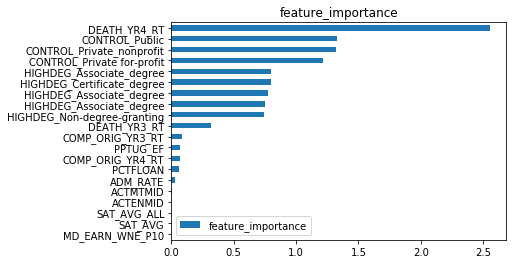

In [41]:
feature_importance_df =pd.DataFrame(data=regressor_best.coef_, index=all_features, columns=["feature_importance"])
ax = feature_importance_df.sort_values("feature_importance", ascending=False).head(20).plot(kind='barh',title='feature_importance')
ax.invert_yaxis()

In [107]:
import statsmodels.api as sm

X = input_train
X.columns = all_features
y = output_train
est = sm.OLS(y.astype(float), X.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:11:56   Log-Likelihood:                 3975.9
No. Observations:                4505   AIC:                            -7854.
Df Residuals:                    4456   BIC:                            -7539.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
ADM_RATE          